In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}


processed_penguins_df = sns.load_dataset('penguins')
processed_penguins_df

EMPIRICALDIST

In [ ]:
!pip install empiricaldist

In [ ]:
import empiricaldist

Función de probabilidad de masas (PMFs)

In [ ]:
empiricaldist.Pmf.from_seq(
    processed_penguins_df.bill_depth_mm,
    normalize=True
)

,
bill_depth_mm,
13.1,0.002924
13.2,0.002924
13.3,0.002924
13.4,0.002924
13.5,0.005848
...,...
20.7,0.008772
20.8,0.002924
21.1,0.008772


In [ ]:
pmf_bill_depth_mm = empiricaldist.Pmf.from_seq(
    processed_penguins_df.bill_depth_mm,
    normalize=True
)

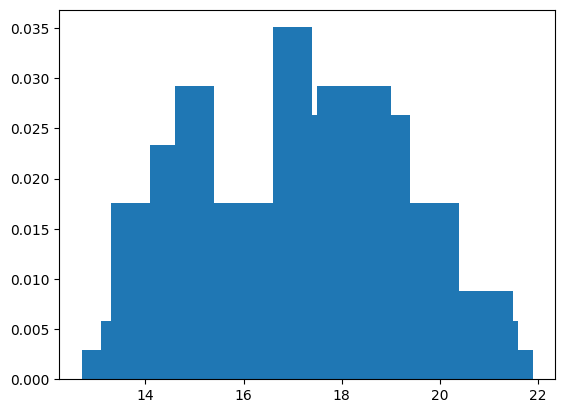

In [ ]:
pmf_bill_depth_mm.bar()

In [ ]:
pmf_bill_depth_mm(20)

0.017543859649122806

Función de distribución acumulada (CDFs)

In [ ]:
cdf_bill_depth_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df.bill_depth_mm,
    normalize=True
)
cdf_bill_depth_mm

,
bill_depth_mm,
13.1,0.002924
13.2,0.005848
13.3,0.008772
13.4,0.011696
13.5,0.017544
...,...
20.7,0.979532
20.8,0.982456
21.1,0.991228


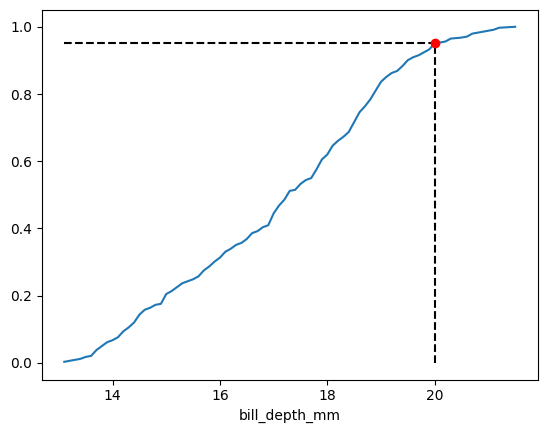

In [ ]:
cdf_bill_depth_mm.plot()
q = 20
p = cdf_bill_depth_mm.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color = 'black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_bill_depth_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q, p, 'ro')

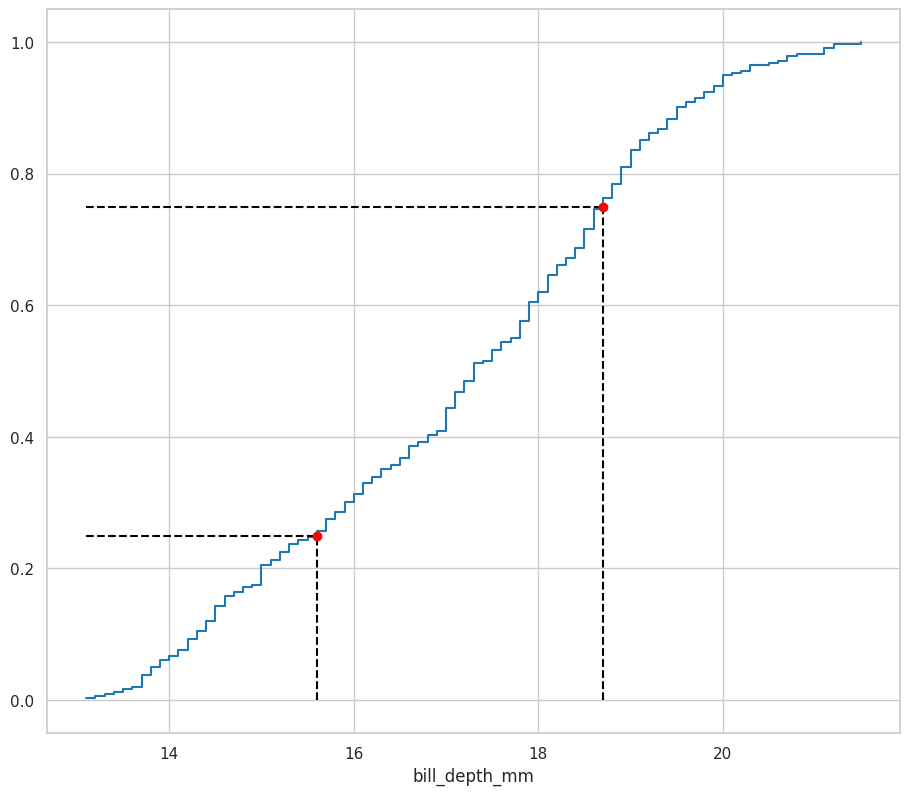

In [ ]:
cdf_bill_depth_mm.step()

p_1 = 0.25 # Specify probability
p_2 = 0.75

ps = (0.25, 0.75) # IQR
qs = cdf_bill_depth_mm.inverse(ps)

plt.vlines(
    x=qs,
    ymin=0,
    ymax=ps,
    color = 'black',
    linestyle='dashed'
)

plt.hlines(
    y=ps,
    xmin=pmf_bill_depth_mm.qs[0],
    xmax=qs,
    color='black',
    linestyle='dashed'
)

plt.scatter(
    x=qs,
    y=ps,
    color='red',
    zorder=2
)

COMPARANDO DISTRIBUCIONES

<Axes: xlabel='bill_depth_mm', ylabel='Proportion'>

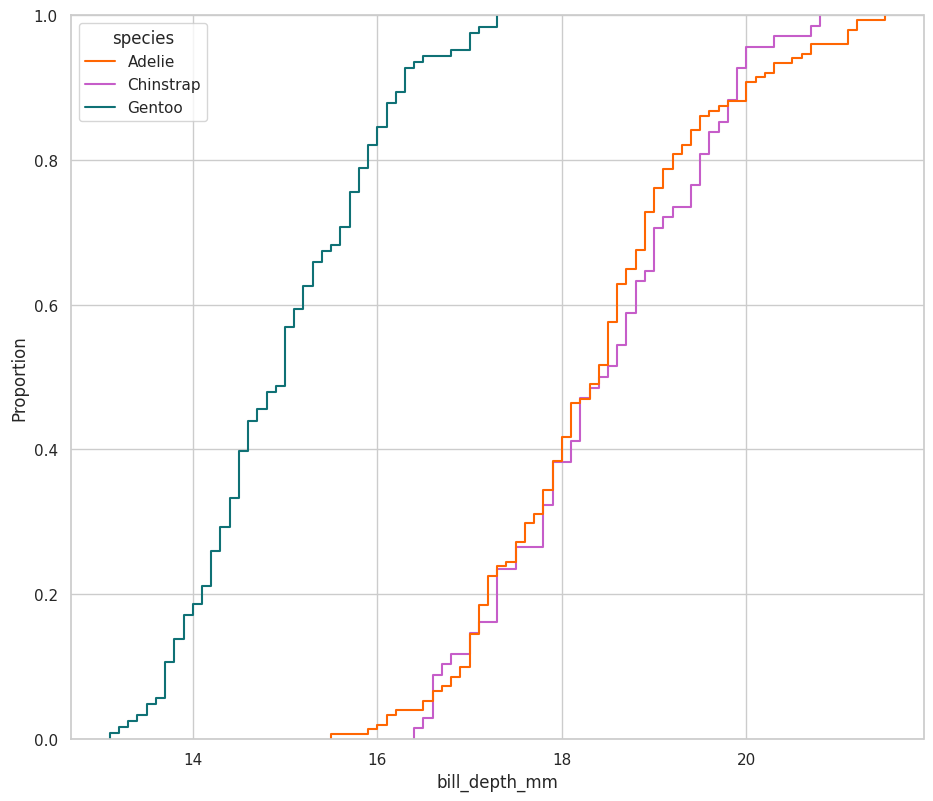

In [ ]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='bill_depth_mm',
    hue='species',
    palette=penguin_color
)

Funciones de densidad de probabilidad

<Axes: xlabel='bill_depth_mm', ylabel='Density'>

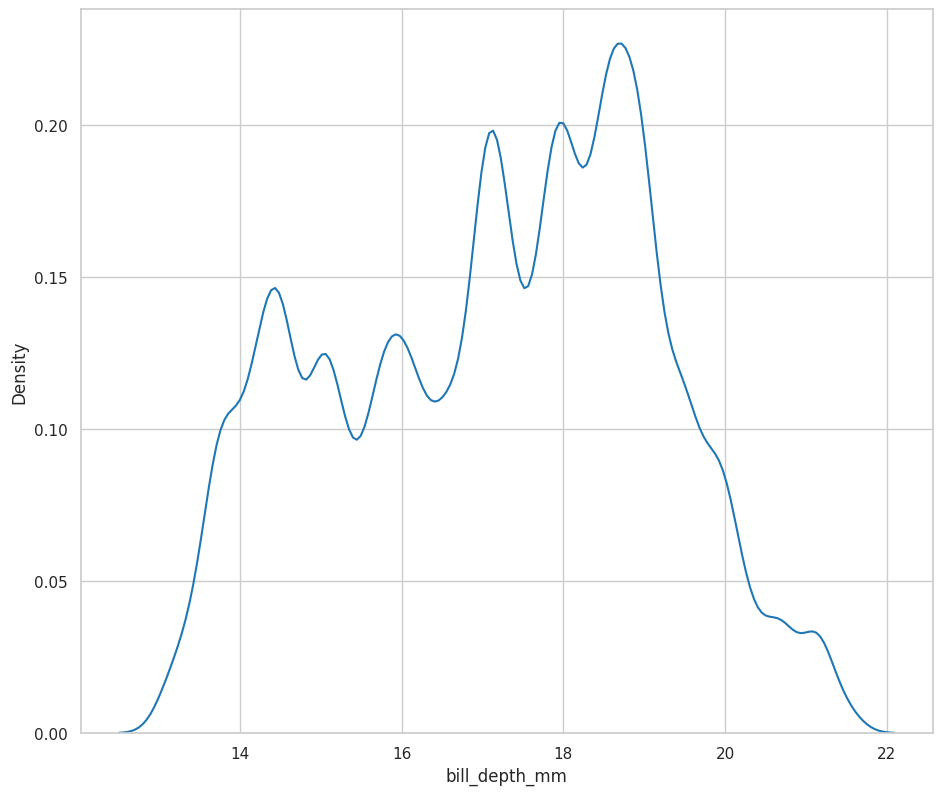

In [ ]:
sns.kdeplot(
    data=processed_penguins_df,
    x='bill_depth_mm',
    bw_method=0.1
)

In [ ]:
stats = processed_penguins_df.body_mass_g.describe()
stats

,body_mass_g
count,342.000000
mean,4201.754386
std,801.954536
min,2700.000000
25%,3550.000000
50%,4050.000000
75%,4750.000000
max,6300.000000


generamos un vector que vaya desde el minimo hasta el maximo de stats

In [ ]:
!pip install scipy

In [ ]:
import scipy

In [ ]:
xs = np.linspace(stats['min'],stats['max'])
ys = scipy.stats.norm(stats['mean'],stats['std']).cdf(xs)
ys

array([0.03056059, 0.03745582, 0.04557216, 0.05504607, 0.06601225,
       0.07859975, 0.0929276 , 0.1091002 , 0.12720261, 0.14729588,
       0.16941268, 0.19355346, 0.21968339, 0.24773013, 0.27758288,
       0.30909253, 0.34207329, 0.37630551, 0.41153992, 0.44750299,
       0.48390319, 0.52043813, 0.55680205, 0.59269345, 0.62782261,
       0.66191854, 0.69473525, 0.72605692, 0.75570199, 0.78352586,
       0.8094223 , 0.83332353, 0.85519902, 0.87505326, 0.89292249,
       0.90887086, 0.92298596, 0.9353742 , 0.94615603, 0.95546139,
       0.96342539, 0.97018445, 0.97587298, 0.98062054, 0.98454969,
       0.98777435, 0.99039874, 0.99251675, 0.99421182, 0.99555707])

<Axes: xlabel='body_mass_g'>

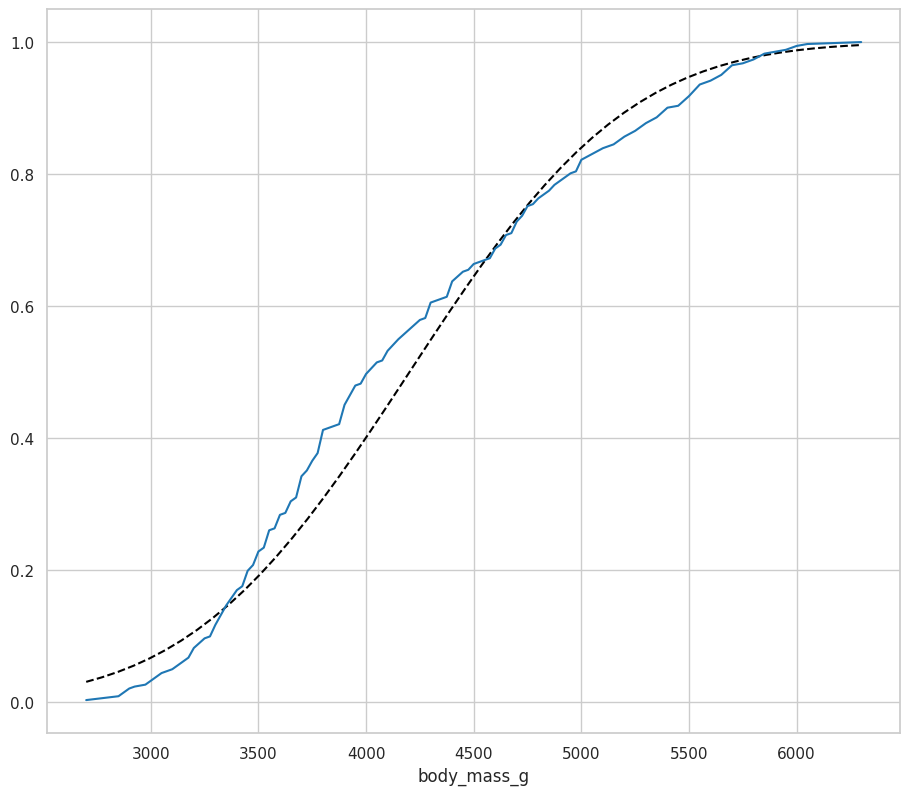

In [ ]:
plt.plot(xs, ys, color='black', linestyle='dashed')
empiricaldist.Cdf.from_seq(
    processed_penguins_df.body_mass_g,
    normalize=True
).plot()

<Axes: xlabel='body_mass_g', ylabel='Density'>

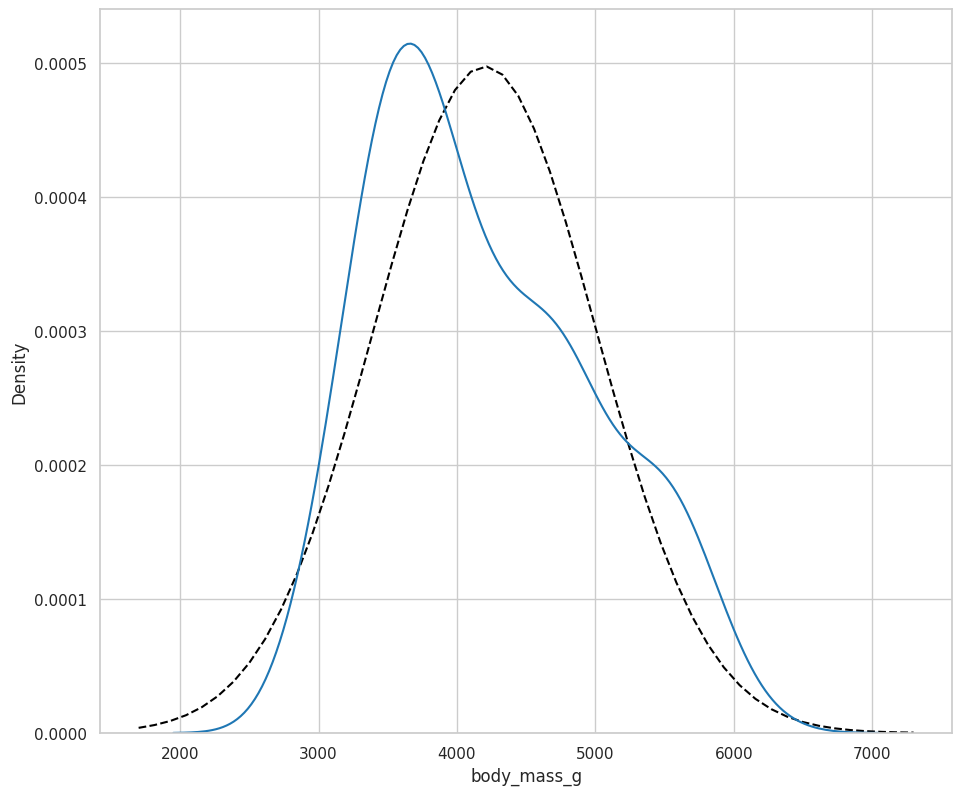

In [ ]:
xs = np.linspace(stats['min']-1000, stats['max'] + 1000)
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data=processed_penguins_df,
    x='body_mass_g'
)